LSTM vs Transformer

In [1]:
#imports
import os
import sys
sys.path.append(os.getenv("PROJECT_PATH"))

from utils.drawpitch import draw_pitch, draw_points_on_pitch,draw_paths_on_pitch
from utils.pitchconfig import SoccerPitchConfiguration

import pandas as pd
import numpy as np
import supervision as sv
import ast
import matplotlib.pyplot as plt
import cv2

df = pd.read_csv("../../data/predicted/tf_pred_xy_comb.csv")

In [2]:
df.columns

Index(['frame_index', 'pred_ball', 'pred_id_10_team_0', 'pred_id_11_team_1',
       'pred_id_12_team_1', 'pred_id_13_team_0', 'pred_id_14_team_1',
       'pred_id_15_team_1', 'pred_id_16_team_0', 'pred_id_17_team_0',
       'pred_id_18_team_1', 'pred_id_1_team_0', 'pred_id_20_team_0',
       'pred_id_22_team_1', 'pred_id_281_team_0', 'pred_id_2_team_0',
       'pred_id_3_team_1', 'pred_id_45_team_0', 'pred_id_4_team_0',
       'pred_id_5_team_0', 'pred_id_6_team_1', 'pred_id_7_team_1',
       'pred_id_8_team_1', 'pred_id_9_team_1', 'true_ball',
       'true_id_10_team_0', 'true_id_11_team_1', 'true_id_12_team_1',
       'true_id_13_team_0', 'true_id_14_team_1', 'true_id_15_team_1',
       'true_id_16_team_0', 'true_id_17_team_0', 'true_id_18_team_1',
       'true_id_1_team_0', 'true_id_20_team_0', 'true_id_22_team_1',
       'true_id_281_team_0', 'true_id_2_team_0', 'true_id_3_team_1',
       'true_id_45_team_0', 'true_id_4_team_0', 'true_id_5_team_0',
       'true_id_6_team_1', 'true_

In [3]:
#Supervision - virtualization
CONFIG = SoccerPitchConfiguration()

edge_annotator = sv.EdgeAnnotator(
    color=sv.Color.from_hex('#00BFFF'),
    thickness=2, edges=CONFIG.edges)
vertex_annotator = sv.VertexAnnotator(
    color=sv.Color.from_hex('#FF1493'),
    radius=8)
vertex_annotator_2 = sv.VertexAnnotator(
    color=sv.Color.from_hex('#00BFFF'),
    radius=8)

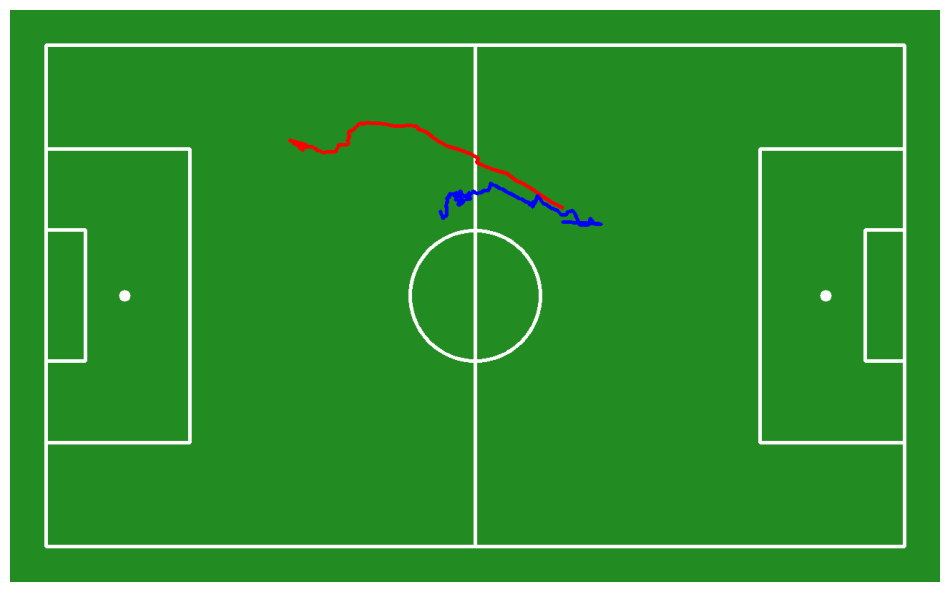

In [4]:
# Draw the pitch
CONFIG = SoccerPitchConfiguration()
annotated_frame = draw_pitch(CONFIG)

# Extract predicted and true ball coordinates
pred_ball_xy = df['pred_id_9_team_1'].dropna().apply(ast.literal_eval).tolist()
true_ball_xy = df['true_id_9_team_1'].dropna().apply(ast.literal_eval).tolist()

# Convert to NumPy arrays
pitch_pred_ball_xy = np.array(pred_ball_xy)
pitch_true_ball_xy = np.array(true_ball_xy)

# Draw the predicted path
annotated_frame = draw_paths_on_pitch(
    config=CONFIG,
    paths=[pitch_pred_ball_xy],
    color=sv.Color.RED,
    thickness=4,
    pitch=annotated_frame
)

# Draw the true path
annotated_frame = draw_paths_on_pitch(
    config=CONFIG,
    paths=[pitch_true_ball_xy],
    color=sv.Color.BLUE,
    thickness=4,
    pitch=annotated_frame
)

# Display the result
sv.plot_image(annotated_frame)
